### Model LDA All

In [1]:
import pandas as pd
import concurrent.futures
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Fungsi untuk menerapkan model LDA pada data yang telah diproses
def apply_lda(processed_texts):
    def fit_lda(processed_text):
        vectorizer = CountVectorizer()
        X = vectorizer.fit_transform(processed_text)

        lda = LatentDirichletAllocation(n_components=5, random_state=42)
        lda.fit(X)

        return lda, vectorizer, X

    with concurrent.futures.ThreadPoolExecutor() as executor:
        results = executor.map(fit_lda, [processed_texts])

    return list(results)[0]

# Fungsi untuk membuat word cloud
def create_wordcloud(lda_model, vectorizer):
    # Ambil 10 kata kunci dari setiap topik
    keywords_per_topic = 10
    topics_keywords = []
    for index, topic in enumerate(lda_model.components_):
        top_words_indices = topic.argsort()[-keywords_per_topic:]
        top_words = [vectorizer.get_feature_names_out()[i] for i in top_words_indices]
        topics_keywords.append(top_words)
    
    # Gabungkan kata kunci dari semua topik menjadi satu teks
    all_keywords = ' '.join([word for sublist in topics_keywords for word in sublist])
    
    # Buat word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_keywords)
    
    # Tampilkan word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Fungsi untuk membuat grafik Distribusi Jumlah Dokumen per Topik
def plot_doc_distribution(lda_model, X):
    doc_topic_distribution = lda_model.transform(X)
    doc_topics = doc_topic_distribution.argmax(axis=1)
    
    plt.figure(figsize=(10, 5))
    plt.hist(doc_topics, bins=len(set(doc_topics)), color='skyblue', edgecolor='black', alpha=0.7)
    plt.title('Distribusi Jumlah Dokumen per Topik')
    plt.xlabel('Topik')
    plt.ylabel('Jumlah Dokumen')
    plt.xticks(range(len(set(doc_topics))))
    plt.show()

# Fungsi untuk membuat grafik Distribusi Probabilitas Topik per Dokumen
def plot_topic_prob_distribution(lda_model, X):
    doc_topic_distribution = lda_model.transform(X)
    
    plt.figure(figsize=(10, 5))
    for i in range(lda_model.n_components):
        plt.hist(doc_topic_distribution[:,i], bins=30, alpha=0.5, label=f'Topik {i+1}')
    plt.title('Distribusi Probabilitas Topik per Dokumen')
    plt.xlabel('Probabilitas')
    plt.ylabel('Jumlah Dokumen')
    plt.legend()
    plt.show()
    
# Fungsi untuk membuat grafik Distribusi Probabilitas Kata per Topik
def plot_topic_word_distribution(lda_model, vectorizer):
    plt.figure(figsize=(15, 8))
    topics = lda_model.components_
    n_top_words = 10  # Ubah sesuai dengan jumlah kata kunci yang ingin ditampilkan
    
    for i, topic in enumerate(topics):
        top_words_idx = topic.argsort()[:-n_top_words - 1:-1]
        top_words_vals = topic[top_words_idx]
        top_words = [vectorizer.get_feature_names_out()[idx] for idx in top_words_idx]
        plt.barh(np.arange(n_top_words), top_words_vals, alpha=0.5, label=f'Topik {i+1}')
        plt.yticks(np.arange(n_top_words), top_words)
    
    plt.xlabel('Probabilitas Kata')
    plt.ylabel('Kata')
    plt.title('Distribusi Probabilitas Kata per Topik')
    plt.legend()
    plt.show()

In [3]:
df = pd.read_csv("lda_content_all_new.csv")
print(len(df))

51366


In [4]:
df.head(10)

,processed_content
0,kumaha barudak well yuk ramaikan pesta anak no...
1,kustini sri purnomo memiliki strategi jitu men...
2,peraih emas olimpiade tokyo greysia polii bica...
3,kapolri jenderal lisyto sigit prabowo bicara s...
4,menteri bumn erick thohir bicara bangsa indone...
5,iring iringan mobil suv pasukan pengawal presi...
6,remaja palestina umur 14 tahun ditembak mati p...
7,ketua umum pdip megawati soekarnoputri kader m...
8,sekjen pdip hasto kristiyanto berbicara terkai...
9,presiden joko widodo memimpin upacara peringat...


In [5]:
df.dropna(subset=['processed_content'], inplace=True)

In [6]:
# Apply LDA model with multithreading
lda_model, vectorizer, X = apply_lda(df['processed_content'])

In [7]:
print("Topik dari model LDA:")
for index, topic in enumerate(lda_model.components_):
    print(f"Topik {index+1}:")
    top_words_indices = topic.argsort()[-10:]  # Ubah menjadi 10 kata kunci per topik
    top_words = [vectorizer.get_feature_names_out()[i] for i in top_words_indices]
    print(top_words)

Topik dari model LDA:
Topik 1:
['wib', 'tahun', '10', 'masyarakat', 'warga', 'kota', 'dki', 'jalan', '2023', 'jakarta']
Topik 2:
['gaza', '10', 'pelaku', 'polisi', 'metro', 'rumah', '2023', 'israel', 'firli', 'korban']
Topik 3:
['hakim', 'konstitusi', 'pemerintah', 'putusan', 'masyarakat', 'mk', 'negara', '2023', 'tahun', 'indonesia']
Topik 4:
['capres', 'ketua', 'mahfud', 'jokowi', 'partai', 'cawapres', 'ganjar', 'presiden', 'gibran', 'prabowo']
Topik 5:
['tahun', 'hukum', 'uang', 'pidana', 'rp', '2023', 'tersangka', 'pasal', 'korupsi', 'kpk']


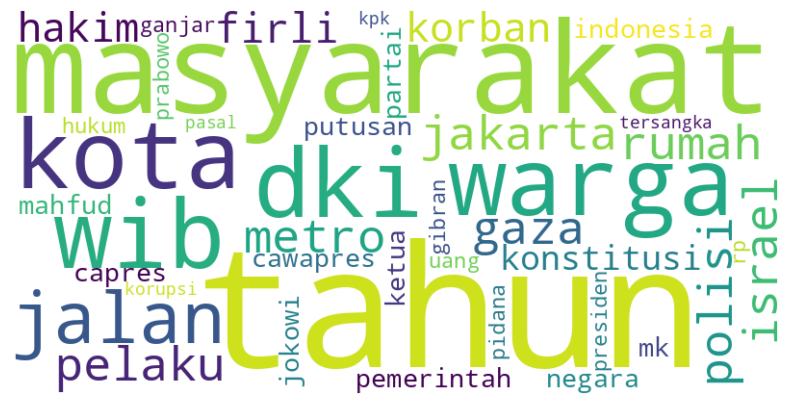

In [8]:
create_wordcloud(lda_model, vectorizer)

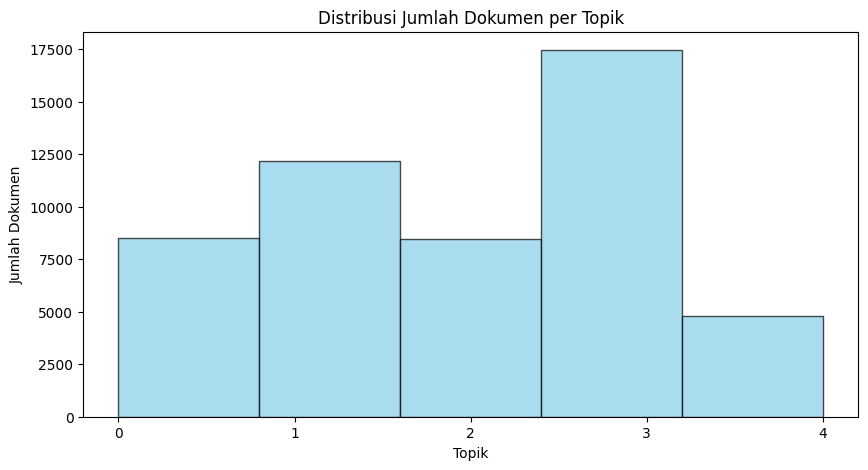

In [9]:
plot_doc_distribution(lda_model, X)

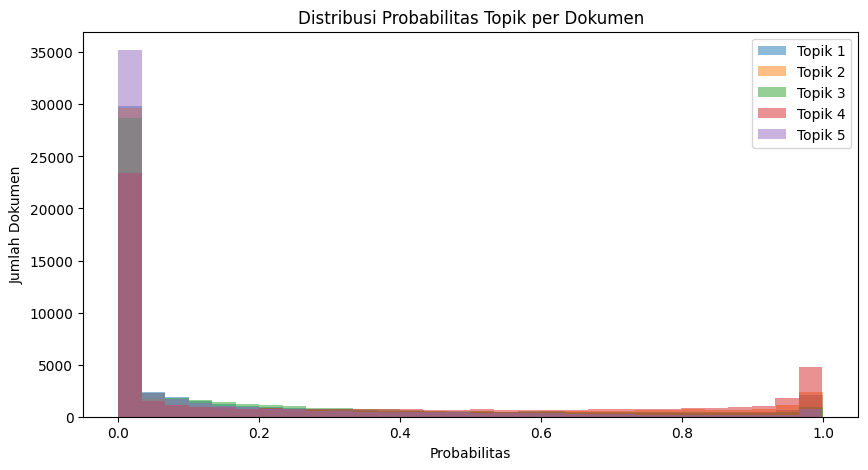

In [10]:
# Plot Distribusi Probabilitas Topik per Dokumen
plot_topic_prob_distribution(lda_model, X)

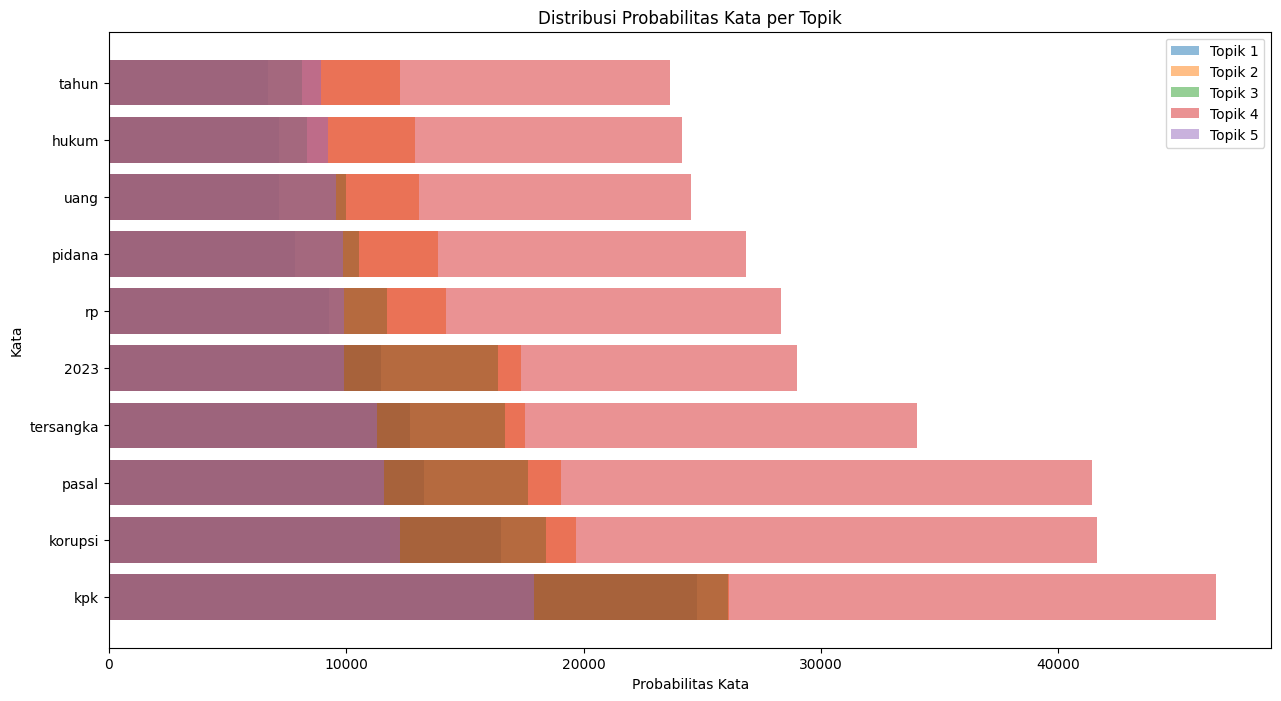

In [11]:
# Plot Distribusi Probabilitas Kata per Topik
plot_topic_word_distribution(lda_model, vectorizer)

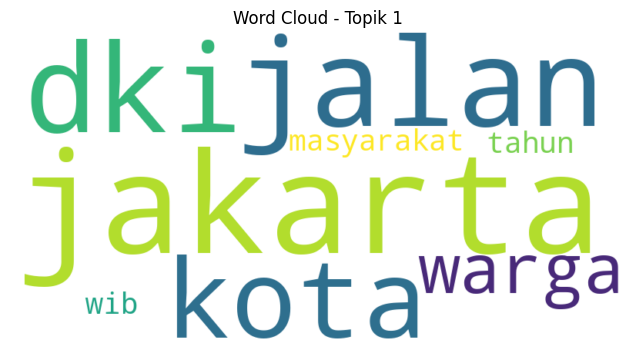

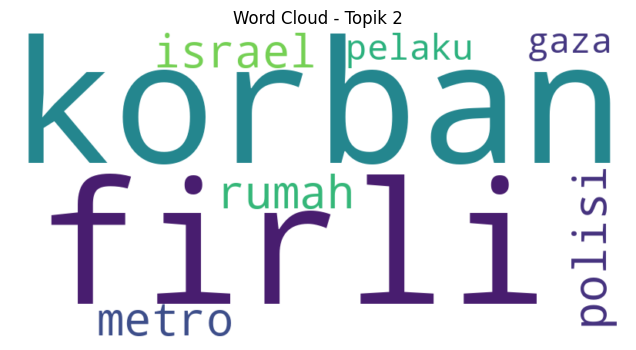

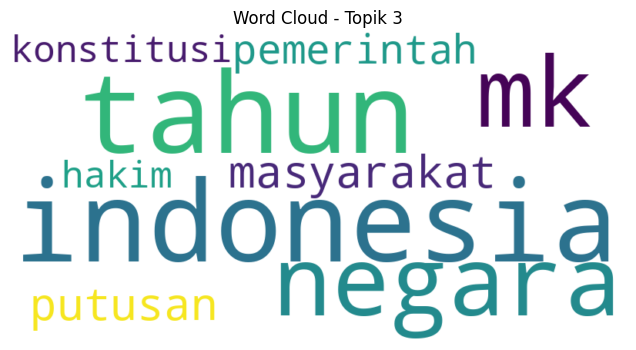

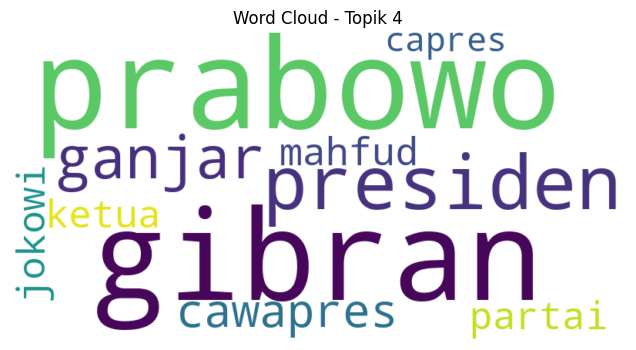

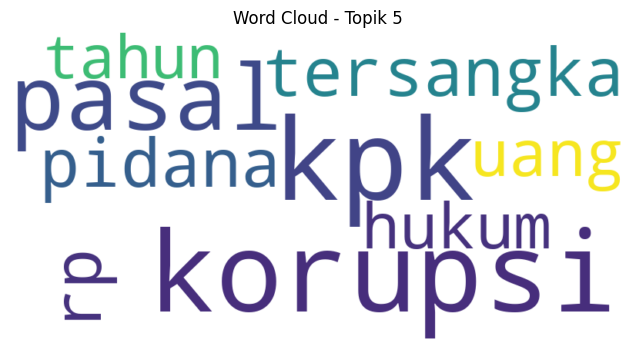

In [12]:
# Fungsi untuk membuat word cloud dari setiap topik
def create_wordcloud_per_topic(lda_model, vectorizer):
    topics = lda_model.components_
    n_top_words = 10  # Ubah sesuai dengan jumlah kata kunci yang ingin ditampilkan
    
    for i, topic in enumerate(topics):
        top_words_idx = topic.argsort()[:-n_top_words - 1:-1]
        top_words_vals = topic[top_words_idx]
        top_words = [vectorizer.get_feature_names_out()[idx] for idx in top_words_idx]
        topic_keywords = ' '.join(top_words)
        
        # Buat word cloud
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(topic_keywords)
        
        # Tampilkan word cloud
        plt.figure(figsize=(8, 4))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Word Cloud - Topik {i+1}')
        plt.axis('off')
        plt.show()

# Membuat word cloud dari setiap topik
create_wordcloud_per_topic(lda_model, vectorizer)
